In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
import xgboost
from sklearn.metrics import accuracy_score
%matplotlib inline

# Load and clean data 

In [3]:
#load data
csv_file = '../../../SEEM_bile_acid_data_patient.csv'
df_patient = pd.read_csv(csv_file, index_col=None,na_values=['#VALUE!', '#DIV/0!'])
csv_file2 = '../../../SEEM serum bile acid data for biopsies available.csv'
df_biopsy = pd.read_csv(csv_file2, index_col = None,na_values=['#VALUE!', '#DIV/0!'])
# csv_file3 = 'temp.csv'
# biopsy_data = pd.read_csv(csv_file3)

In [4]:
#remove 'Barcode','CMS ID','LC/MS code# and Group
df_patient = df_patient[df_patient.Group == '3-6 month Case']
df_patient = df_patient.drop(['Barcode','CMS ID','LC/MS code#','Group'], axis=1)
df_patient = df_patient.reset_index(drop=True)
df_patient['Target'] = 0
#
#remove 'Barcode','CMS ID','LC/MS code# and Group
df_biopsy = df_biopsy[df_biopsy.Group == '3-6 month Case']
df_biopsy = df_biopsy.drop(['Barcode','CMS ID','LC/MS code#','Group','Folder name','Total Slides','Images available'], axis=1)
df_biopsy = df_biopsy.reset_index(drop=True)
df_biopsy['Target'] = 0

# Populate "Reponse" value

In [5]:
index = []
def find_index(biopsy_data,biomaker_data):
    for i in range(0,len(biopsy_data)):
        for j in range(0,len(biomaker_data)):
            if biomaker_data['Patient ID'].loc[j] == biopsy_data['Patient ID'].loc[i]:
                index.append(j)

## Populate "Response" value to patient set

In [6]:
find_index(df_biopsy,df_patient)
index = set(index)

In [7]:
for val in index:
    df_patient['Target'].loc[val] = 1

C:\Users\Saurav\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Random Forest

In [8]:
df_patient = df_patient.dropna()
X = df_patient.iloc[:,1:-1]
X = X.reset_index(drop=True)
y = df_patient.iloc[:,-1]
y = y.reset_index(drop=True)

## Train Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0, random_state=42)
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

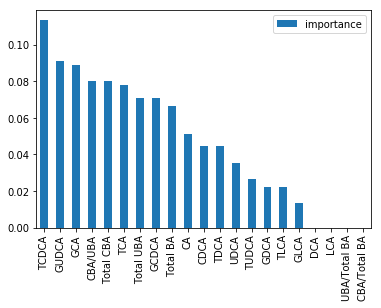

In [38]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')

## Test_size=0.33

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

0.8990825688073395

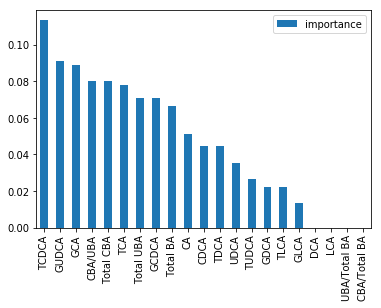

In [43]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')

## MLP Classifier

In [29]:
mlp = MLPClassifier()

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy_score(y_test, y_pred)

0.9357798165137615

## XGBoost

In [44]:
xgb = xgboost.XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# xgb.score(X_test, y_pred)
accuracy_score(y_test, y_pred)

C:\Users\Saurav\Documents\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9357798165137615

In [36]:
np.sum(y)

23

In [37]:
len(y)

329

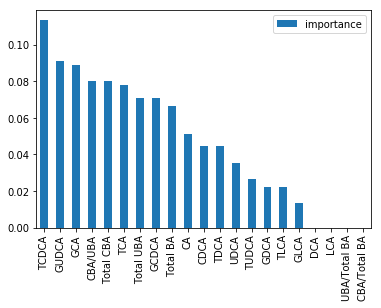

In [45]:
feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')